In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data=pd.read_csv(r'C:\Users\my pc\data_1.csv')

In [4]:
data.head()

,Unnamed: 0,Unnamed: 0.1,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,video,vote_average,vote_count,release_year,release_month,release_day,count_genres,count_company,count_spoken,count_country
0,0,0,0,"['Drama', 'Crime', 'Comedy']",2.0,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,6.656,...,False,6.8,134.0,1988.0,10.0,21.0,3,1,2,1
1,1,1,0,"['Drama', 'Comedy']",3.0,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",6.205,...,False,7.2,132.0,1986.0,10.0,17.0,2,1,3,1
2,2,2,4000000,"['Crime', 'Comedy']",5.0,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,8.307,...,False,5.7,1936.0,1995.0,9.0,12.0,2,2,1,1
3,3,3,21000000,"['Action', 'Thriller', 'Crime']",6.0,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",6.944,...,False,6.4,191.0,1993.0,10.0,15.0,3,3,1,2
4,4,4,42000,['Documentary'],8.0,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,1.652,...,False,7.4,14.0,2006.0,1.0,1.0,1,1,5,1


In [5]:
data=data.drop(['Unnamed: 0'],axis=1)
data=data.drop(['Unnamed: 0.1'],axis=1)

data=data.drop(['id'],axis=1)
data=data.drop(['imdb_id'],axis=1)

In [7]:
data.head().T

,0,1,2,3,4
budget,0,0,4000000,21000000,42000
genres,"['Drama', 'Crime', 'Comedy']","['Drama', 'Comedy']","['Crime', 'Comedy']","['Action', 'Thriller', 'Crime']",['Documentary']
original_language,fi,fi,en,en,en
original_title,Ariel,Varjoja paratiisissa,Four Rooms,Judgment Night,Life in Loops (A Megacities RMX)
overview,Taisto Kasurinen is a Finnish coal miner whose...,"An episode in the life of Nikander, a garbage ...",It's Ted the Bellhop's first night on the job....,"While racing to a boxing match, Frank, Mike, J...",Timo Novotny labels his new project an experim...
popularity,6.656,6.205,8.307,6.944,1.652
production_companies,['Villealfa Filmproductions'],['Villealfa Filmproductions'],"['Miramax', 'A Band Apart']","['Universal Pictures', 'Largo Entertainment', ...",['inLoops']
production_countries,['Finland'],['Finland'],['United States of America'],"['Japan', 'United States of America']",['Austria']
revenue,0,0,4.25735e+06,1.21369e+07,0
runtime,73,74,98,110,80


# plotting graph between vote average with count_genres ,count_company,count_spoken ,count_country

<AxesSubplot:xlabel='count_genres'>

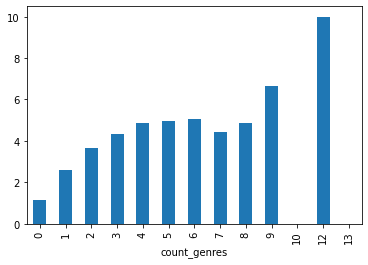

In [9]:
data.groupby('count_genres')['vote_average'].mean().plot(kind='bar')

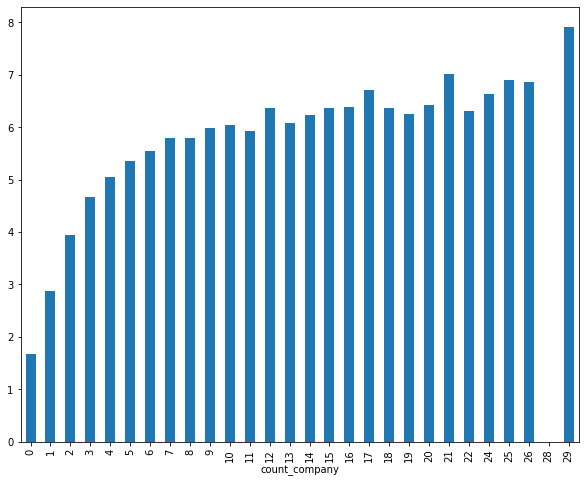

In [10]:
plt.figure(figsize=(10,8))
data.groupby('count_company')['vote_average'].mean().plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='count_spoken'>

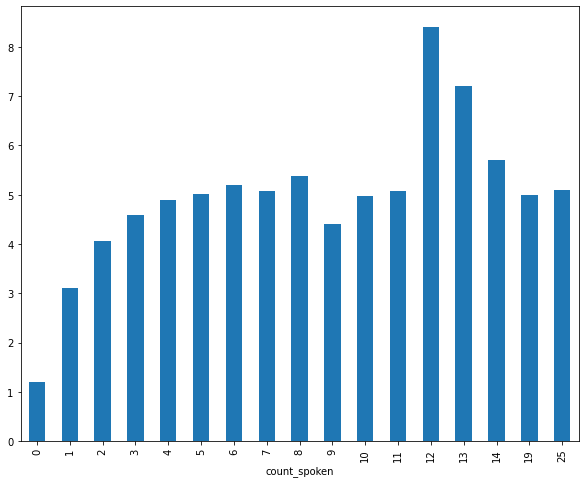

In [11]:
plt.figure(figsize=(10,8))
data.groupby('count_spoken')['vote_average'].mean().plot(kind='bar')

<AxesSubplot:xlabel='count_country'>

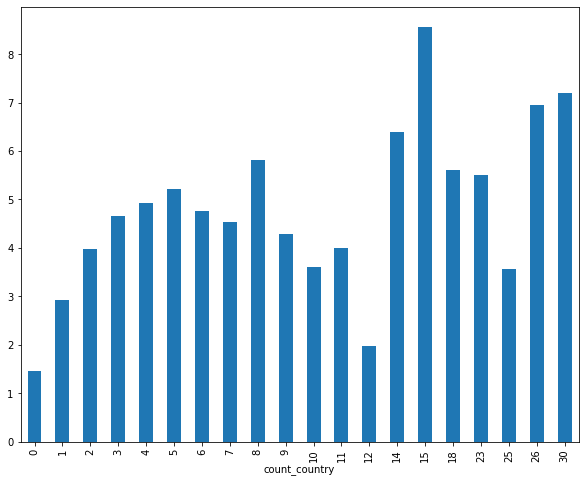

In [12]:
plt.figure(figsize=(10,8))
data.groupby('count_country')['vote_average'].mean().plot(kind='bar')

# TOP 10 RELEASE YEAR WITH VOTE AVERAGE

<AxesSubplot:xlabel='release_year'>

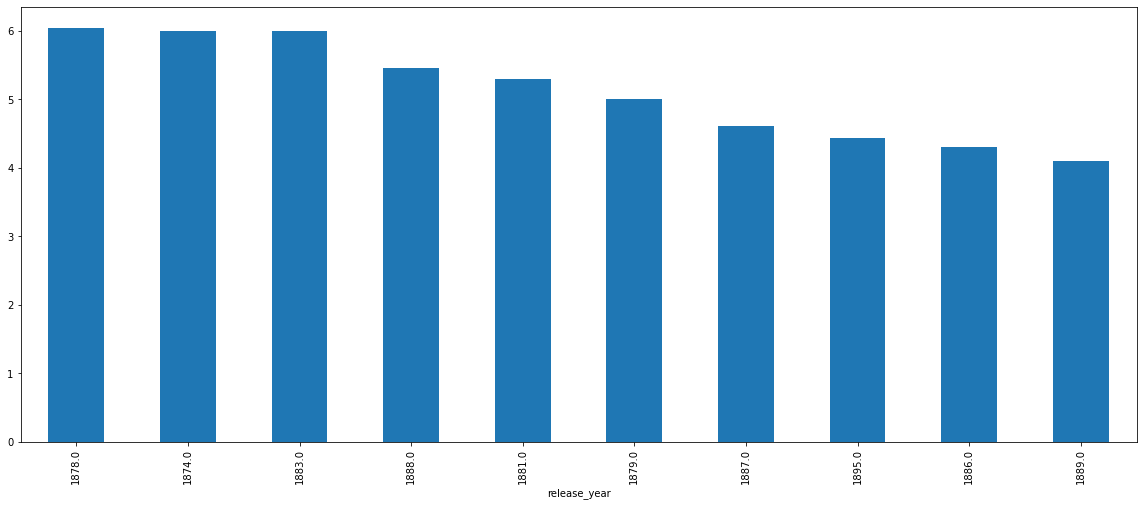

In [14]:
plt.figure(figsize=(20,8))
data.groupby('release_year')['vote_average'].mean().sort_values(ascending=False).head(10).plot(kind='bar')



<AxesSubplot:xlabel='release_year'>

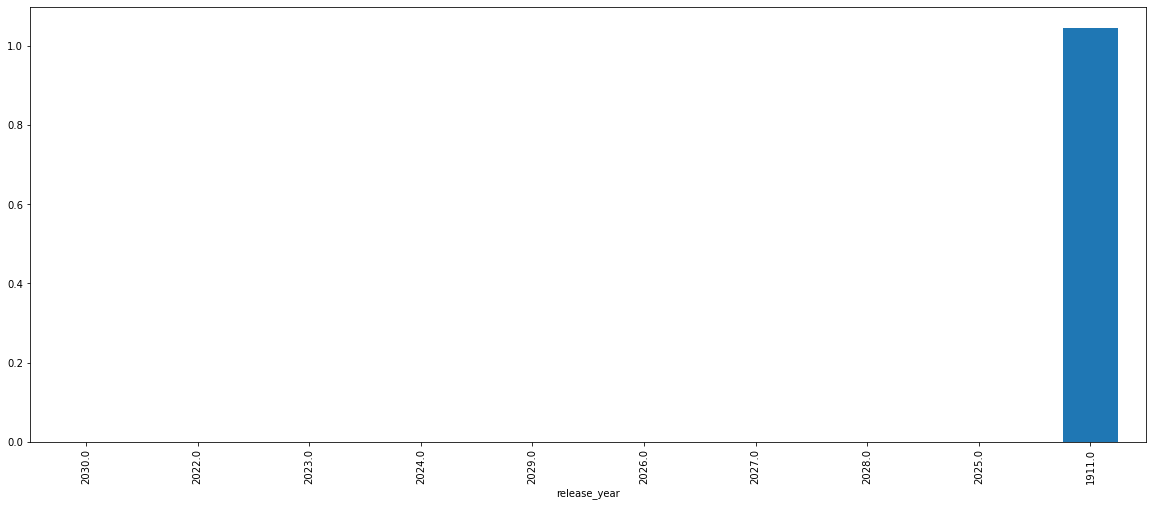

In [16]:
plt.figure(figsize=(20,8))
data.groupby('release_year')['vote_average'].mean().sort_values(ascending=True).head(10).plot(kind='bar')



# TOP  30 MOVIES WITH 10 vote average


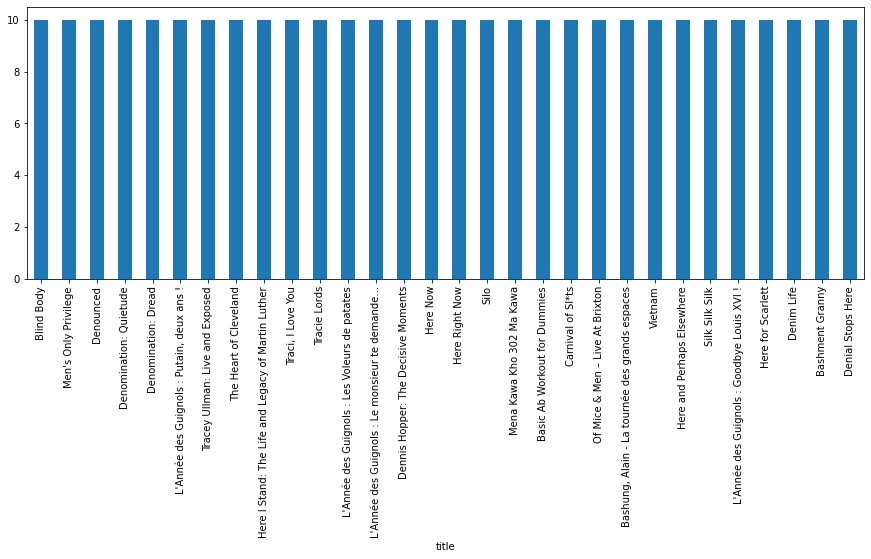

In [18]:
plt.figure(figsize=(15,5))
data.groupby('title')['vote_average'].max().sort_values(ascending=False).head(30).plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='release_year'>

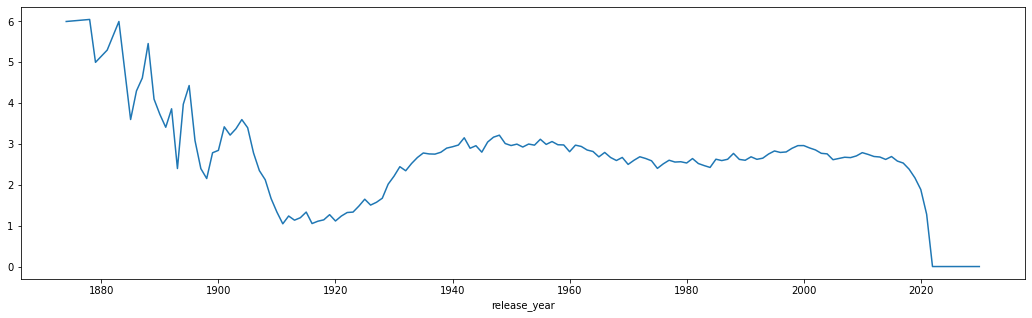

In [19]:
# Checking the trend of vote average over the years
plt.figure(figsize=(18,5))
year_revenue = data.groupby('release_year')['vote_average'].mean()
year_revenue.plot(kind='line')

<AxesSubplot:xlabel='release_year'>

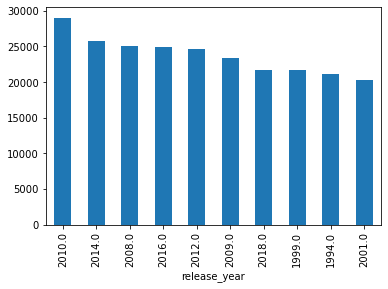

In [21]:
data.groupby('release_year')['vote_count'].max().sort_values(ascending=False).head(10).plot(kind='bar')

In [34]:
most_popular_movies= data[['title', 'vote_count', 'release_year','vote_average']].sort_values('vote_count', ascending=False).head(10)
most_popular_movies

,title,vote_count,release_year,vote_average
16432,Inception,29038.0,2010.0,8.3
100729,Interstellar,25765.0,2014.0,8.3
119,The Dark Knight,25065.0,2008.0,8.5
186128,Deadpool,24864.0,2016.0,7.6
14499,The Avengers,24656.0,2012.0,7.7
12109,Avatar,23364.0,2009.0,7.5
81090,Guardians of the Galaxy,22458.0,2014.0,7.9
191314,Avengers: Infinity War,21756.0,2018.0,8.3
431,Fight Club,21702.0,1999.0,8.4
553,Pulp Fiction,21077.0,1994.0,8.5


<AxesSubplot:xlabel='title'>

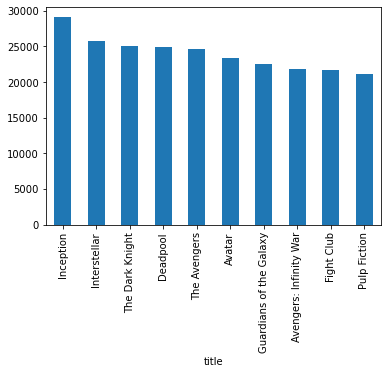

In [32]:
most_popular_movies.groupby('title')['vote_count'].max().sort_values(ascending=False).head(10).plot(kind='bar')

<AxesSubplot:xlabel='release_year'>

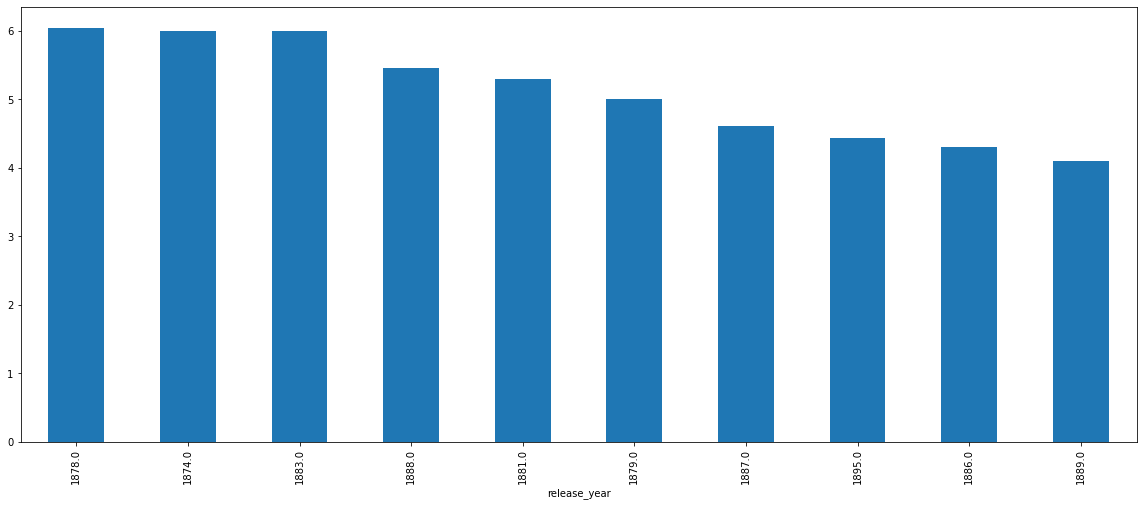

In [36]:
plt.figure(figsize=(20,8))
data.groupby('release_year')['vote_average'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

